# step 1 business problem understanding
predict used car price

# step 2 data understanding

In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_excel("cars_data.xlsx")

In [42]:
df.head()

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
0,2010 Maruti Alto LXI,"₹ 174,699",4out of 5,3686,"Kilometers34,854 km",Year of PurchaseMay 2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP09,NaN,Insurance TypeInsurance Expired
1,2013 Maruti Wagon R 1.0 VXI,"₹ 333,999",4.2out of 5,3686,"Kilometers39,541 km",Year of PurchaseJuly 2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance6/8/2021,Insurance TypeComp
2,2014 Maruti Wagon R 1.0 VXI,"₹ 353,199",4.3out of 5,3686,"Kilometers23,233 km",Year of PurchaseMarch 2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOAP28,Insurance28/4/2021,Insurance TypeComp
3,2013 Hyundai Eon D LITE PLUS,"₹ 237,899",4.4out of 5,3686,"Kilometers27,748 km",Year of PurchaseNovember 2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,RTOAP13,Insurance1/1/2022,Insurance TypeComp
4,2017 Hyundai Eon ERA PLUS,"₹ 300,699",4.4out of 5,3686,"Kilometers12,238 km",Year of PurchaseAugust 2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,RTOTS10,NaN,Insurance TypeExpired


In [43]:
df.columns = df.columns.str.strip()
df.columns

Index(['Name', 'Price', 'Rating', 'city', 'Kilometers', 'Year_of_Purchase',
       'Owner', 'Fuel_Type', 'Transmission', 'RTO', 'Insurance',
       'Insurance_Type'],
      dtype='object')

In [44]:
df.describe(include = 'all')

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
count,32158,32158,32158,32158.000000,32158,32158,32158,32158,29342,32158,22965,32158
unique,6885,4822,38,NaN,29089,343,10,6,2,777,921,12
top,2012 Mahindra XUV500 W8 FWD,"₹ 300,000",4.2out of 5,NaN,"Kilometers100,000 km",Year of PurchaseJanuary 2012,OwnerFirst Owner,FuelDiesel,TransmissionMANUAL,RTOGJ01,Insurance29/3/2021,Insurance TypeComprehensive
freq,105,731,3050,NaN,39,536,19324,15121,26620,2345,119,6506
mean,NaN,NaN,NaN,2883.844207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1569.462476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1692.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2423.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4709.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.dtypes

Name                object
Price               object
Rating              object
city                 int64
Kilometers          object
Year_of_Purchase    object
Owner               object
Fuel_Type           object
Transmission        object
RTO                 object
Insurance           object
Insurance_Type      object
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              32158 non-null  object
 1   Price             32158 non-null  object
 2   Rating            32158 non-null  object
 3   city              32158 non-null  int64 
 4   Kilometers        32158 non-null  object
 5   Year_of_Purchase  32158 non-null  object
 6   Owner             32158 non-null  object
 7   Fuel_Type         32158 non-null  object
 8   Transmission      29342 non-null  object
 9   RTO               32158 non-null  object
 10  Insurance         22965 non-null  object
 11  Insurance_Type    32158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.9+ MB


# Step 3 Exploratory data analysis

In [47]:
df.isnull().sum()

Name                   0
Price                  0
Rating                 0
city                   0
Kilometers             0
Year_of_Purchase       0
Owner                  0
Fuel_Type              0
Transmission        2816
RTO                    0
Insurance           9193
Insurance_Type         0
dtype: int64

In [48]:
# droping Name column
df.drop('Name' , axis=1 , inplace=True)

In [49]:
# droping Rto column
df.drop('RTO' , axis=1 , inplace=True)

### RTO (Regional Transport Office):  
    - Usefulness: Limited unless RTO can indicate regional price differences (like City).
    - Action: Likely redundant if City is already included.

In [50]:
# missing transmission value
2816/29342*100

9.597164474132642

In [51]:
# missing insurance value
9193/22965*100

40.03048116699325

#### the rule of thumb says we can safely drop 5% or less than that data from orignal data , but we have more than 5% data missing

#### since we cant replace insurance data with mode as large amount of data is missing and we cant fill  any value so we will drop the column

In [52]:
df.drop('Insurance' ,axis=1 ,inplace=True)

#### Since only 9.6% of the data is missing, mode imputation is generally a good starting point unless the missingness shows a strong correlation with other features for Transmission

In [53]:
mode_value = df['Transmission'].mode()[0]
df['Transmission'] = df['Transmission'].fillna(mode_value)

In [54]:
# 1. Clean and convert the 'Price' column
df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True).astype(int)

# 2. Ensure the 'Rating' column is a string, then clean and convert it (extract the numerical part)
df['Rating'] = df['Rating'].astype(str).str.split('out').str[0].astype(float)

# 3. Clean and convert the 'Kilometers' column (remove any unwanted text and convert to float)
df['Kilometers'] = df['Kilometers'].replace({' km': '', ',': '', 'Kilometers': ''}, regex=True).astype(int)

# 4. Extract the year from 'Year_of_Purchase' and convert to integer
df['Year_of_Purchase'] = df['Year_of_Purchase'].str.extract(r'(\d{4})').astype(int)

# Display the cleaned DataFrame
df

,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,Insurance_Type
0,174699,4.0,3686,34854,2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired
1,333999,4.2,3686,39541,2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp
2,353199,4.3,3686,23233,2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp
3,237899,4.4,3686,27748,2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp
4,300699,4.4,3686,12238,2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeExpired
...,...,...,...,...,...,...,...,...,...
32153,150000,3.4,769,95792,2008,OwnerThird Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired
32154,250000,3.5,769,54505,2015,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeInsurance Expired
32155,500000,3.6,769,161322,2008,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeInsurance Expired
32156,600000,4.7,769,52006,2016,OwnerFirst Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeZero Depreciation


In [55]:
df.dtypes

Price                 int32
Rating              float64
city                  int64
Kilometers            int32
Year_of_Purchase      int32
Owner                object
Fuel_Type            object
Transmission         object
Insurance_Type       object
dtype: object

In [56]:
df.describe()

,Price,Rating,city,Kilometers,Year_of_Purchase
count,3.215800e+04,32158.000000,32158.000000,3.215800e+04,32158.000000
mean,4.760937e+05,4.046806,2883.844207,7.630189e+04,2012.378537
std,4.521493e+05,0.617091,1569.462476,5.303039e+04,4.509912
min,1.000000e+00,0.500000,290.000000,1.000000e+00,1980.000000
25%,2.100000e+05,3.800000,1692.000000,3.833125e+04,2010.000000
50%,3.680000e+05,4.100000,2423.000000,6.924700e+04,2013.000000
75%,6.000000e+05,4.400000,4709.000000,1.015375e+05,2016.000000
max,1.080170e+07,5.000000,5732.000000,1.234567e+06,2020.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32158 entries, 0 to 32157
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             32158 non-null  int32  
 1   Rating            32158 non-null  float64
 2   city              32158 non-null  int64  
 3   Kilometers        32158 non-null  int32  
 4   Year_of_Purchase  32158 non-null  int32  
 5   Owner             32158 non-null  object 
 6   Fuel_Type         32158 non-null  object 
 7   Transmission      32158 non-null  object 
 8   Insurance_Type    32158 non-null  object 
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 1.8+ MB


Text(0.5, 1.0, 'Car Price Distribution')

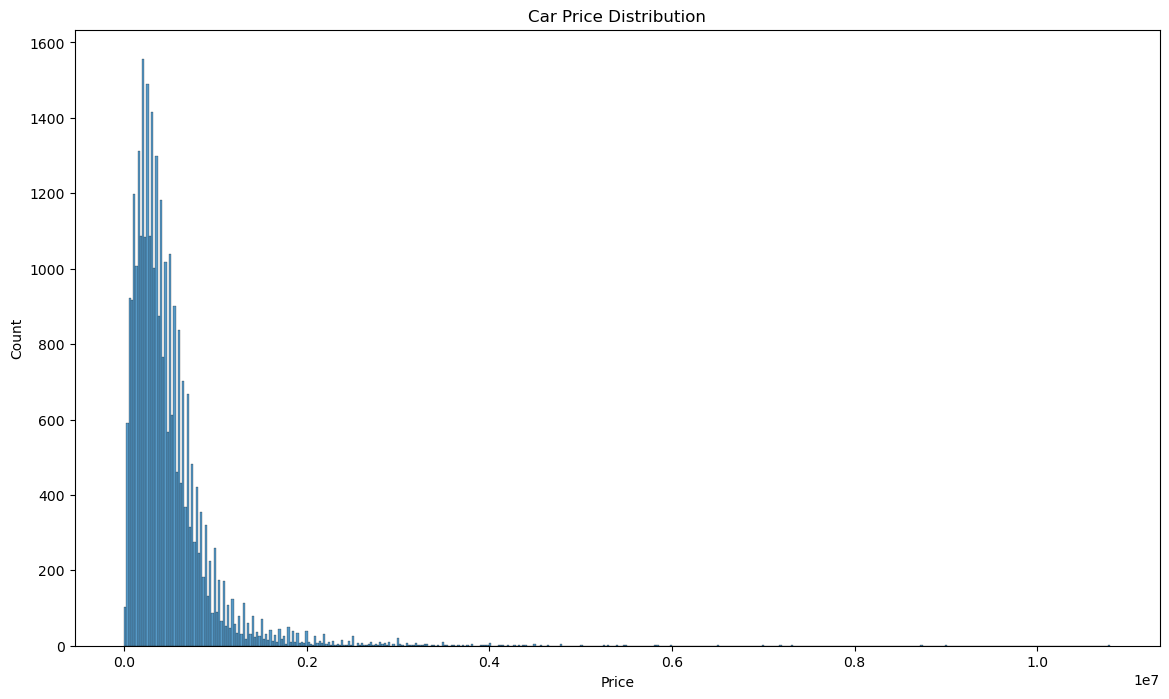

In [58]:

plt.figure(figsize=(14, 8))  # Increase figure size more

sns.histplot(df['Price']);
plt.title('Car Price Distribution')

### dealing with outlier

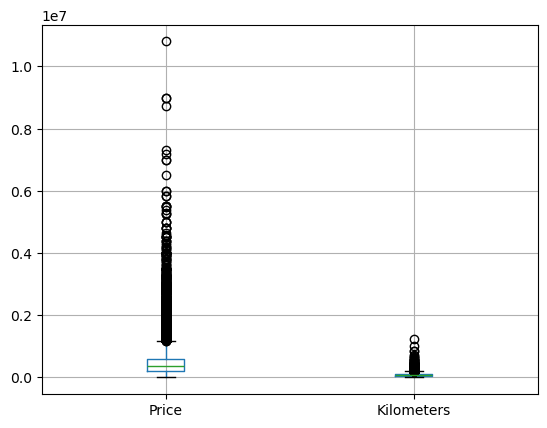

In [59]:
df.boxplot(column = ['Price' , 'Kilometers'])
plt.show()

In [60]:
# Calculate the first and third quartiles (Q1 and Q3) for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Remove outliers based on the IQR
df_out1 = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

# Display the first 5 rows of the resulting dataframe
df_out1.head()


,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,Insurance_Type
0,174699,4.0,3686,34854,2010,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired
1,333999,4.2,3686,39541,2013,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp
2,353199,4.3,3686,23233,2014,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp
3,237899,4.4,3686,27748,2013,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp
4,300699,4.4,3686,12238,2017,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeExpired


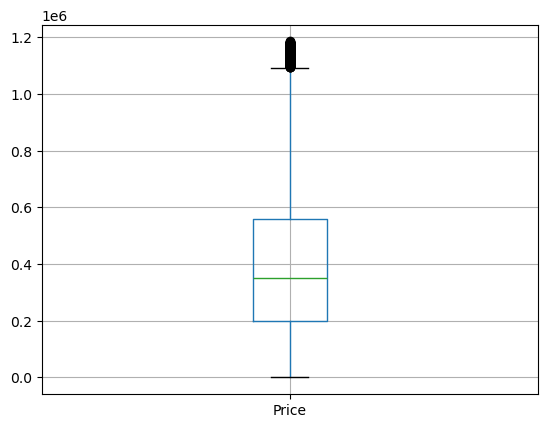

Text(0.5, 1.0, 'Car Price Distribution')

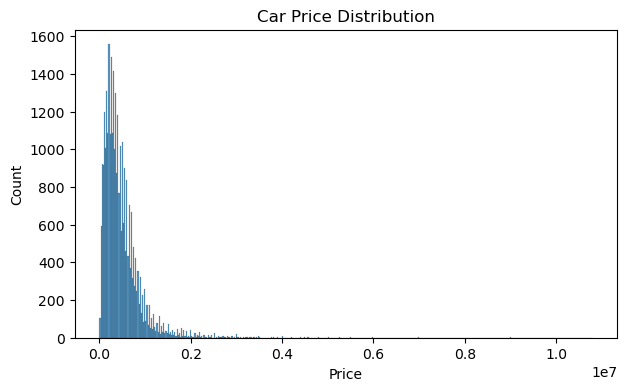

In [61]:
df_out1.boxplot(column = ['Price'])
plt.show()
# outlier are removed
plt.figure(figsize=(7,4))
sns.histplot(df['Price']);
plt.title('Car Price Distribution')

##### It is generally a good idea to transform the "Year_of_Purchase" column into the age of the car rather than keeping it as the purchase year because 
##### the age of the car (i.e., how old it is) is more relevant to the price and value of the car than the exact year it was purchased. 

In [62]:
# Assuming today's date is 2024
current_year = 2024

# Convert "Year_of_Purchase" to the age of the car
df['Car_Age'] = current_year - df['Year_of_Purchase']

# Drop the original "Year_of_Purchase" column if you no longer need it
df = df.drop(columns=['Year_of_Purchase'])

# Display the updated DataFrame
df

,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,Insurance_Type,Car_Age
0,174699,4.0,3686,34854,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired,14
1,333999,4.2,3686,39541,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp,11
2,353199,4.3,3686,23233,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp,10
3,237899,4.4,3686,27748,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp,11
4,300699,4.4,3686,12238,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeExpired,7
...,...,...,...,...,...,...,...,...,...
32153,150000,3.4,769,95792,OwnerThird Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired,16
32154,250000,3.5,769,54505,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeInsurance Expired,9
32155,500000,3.6,769,161322,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeInsurance Expired,16
32156,600000,4.7,769,52006,OwnerFirst Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeZero Depreciation,8


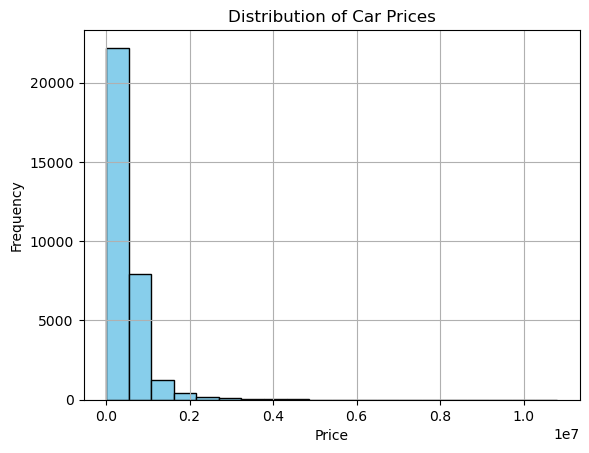

In [63]:
df['Price'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


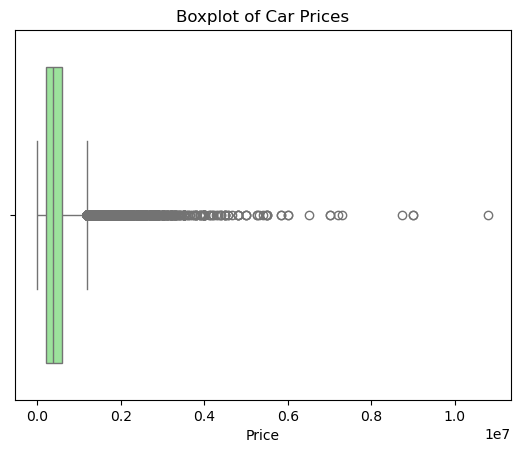

In [64]:
sns.boxplot(x=df['Price'], color='lightgreen')
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()


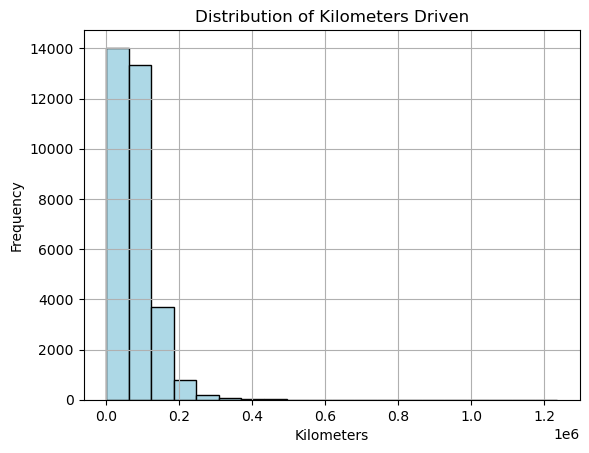

In [65]:
df['Kilometers'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.show()


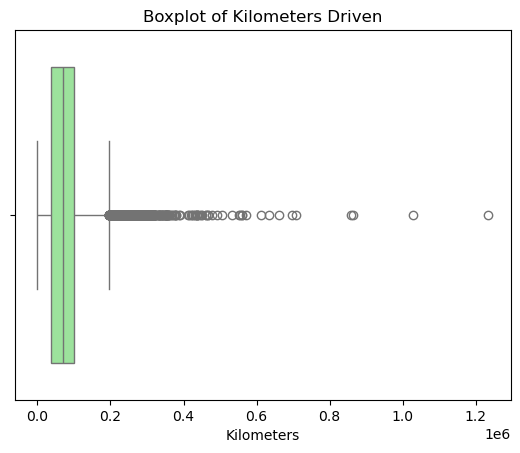

In [66]:
sns.boxplot(x=df['Kilometers'], color='lightgreen')
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers')
plt.show()


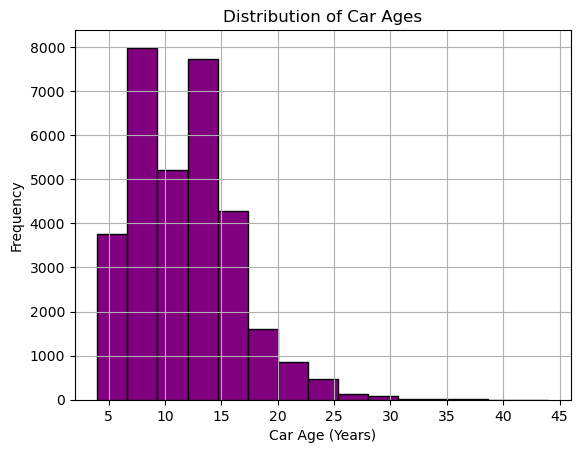

In [67]:
df['Car_Age'].hist(bins=15, color='purple', edgecolor='black')
plt.title('Distribution of Car Ages')
plt.xlabel('Car Age (Years)')
plt.ylabel('Frequency')
plt.show()


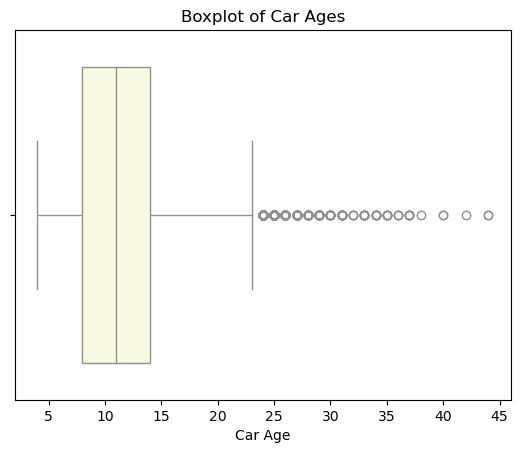

In [68]:
sns.boxplot(x=df['Car_Age'], color='lightyellow')
plt.title('Boxplot of Car Ages')
plt.xlabel('Car Age')
plt.show()


C:\Users\kawle\AppData\Local\Temp\ipykernel_22620\2063126938.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Owner', data=df, palette='viridis')


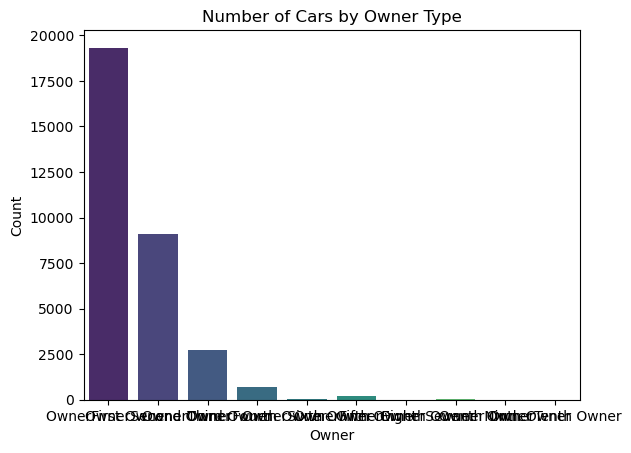

In [69]:
sns.countplot(x='Owner', data=df, palette='viridis')
plt.title('Number of Cars by Owner Type')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()


C:\Users\kawle\AppData\Local\Temp\ipykernel_22620\1289922390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type', data=df, palette='coolwarm')


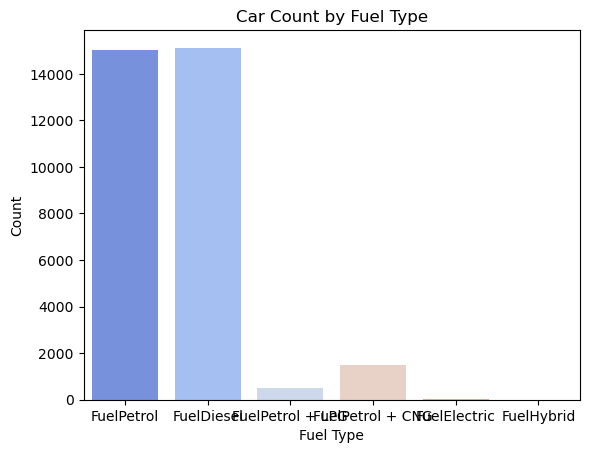

In [70]:
sns.countplot(x='Fuel_Type', data=df, palette='coolwarm')
plt.title('Car Count by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


C:\Users\kawle\AppData\Local\Temp\ipykernel_22620\3114941779.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Insurance_Type', data=df, palette='muted')


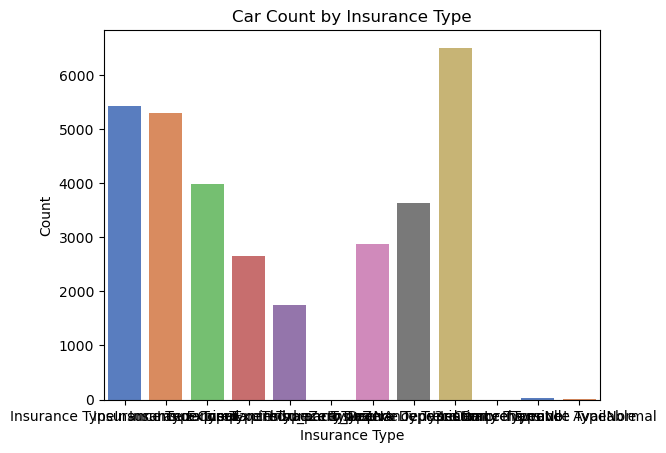

In [71]:
sns.countplot(x='Insurance_Type', data=df, palette='muted')
plt.title('Car Count by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.show()


C:\Users\kawle\AppData\Local\Temp\ipykernel_22620\780695873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=df, palette='coolwarm')


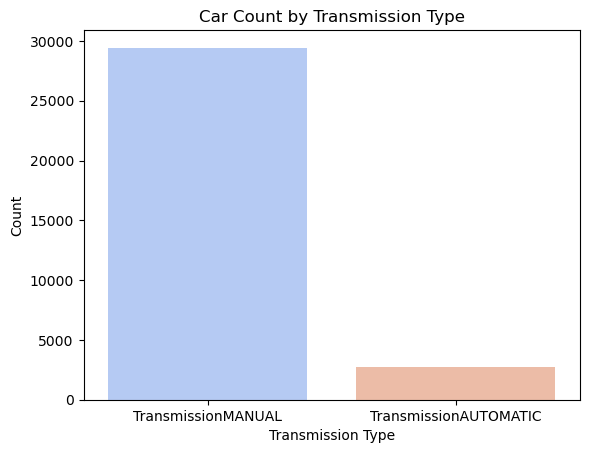

In [72]:
sns.countplot(x='Transmission', data=df, palette='coolwarm')
plt.title('Car Count by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


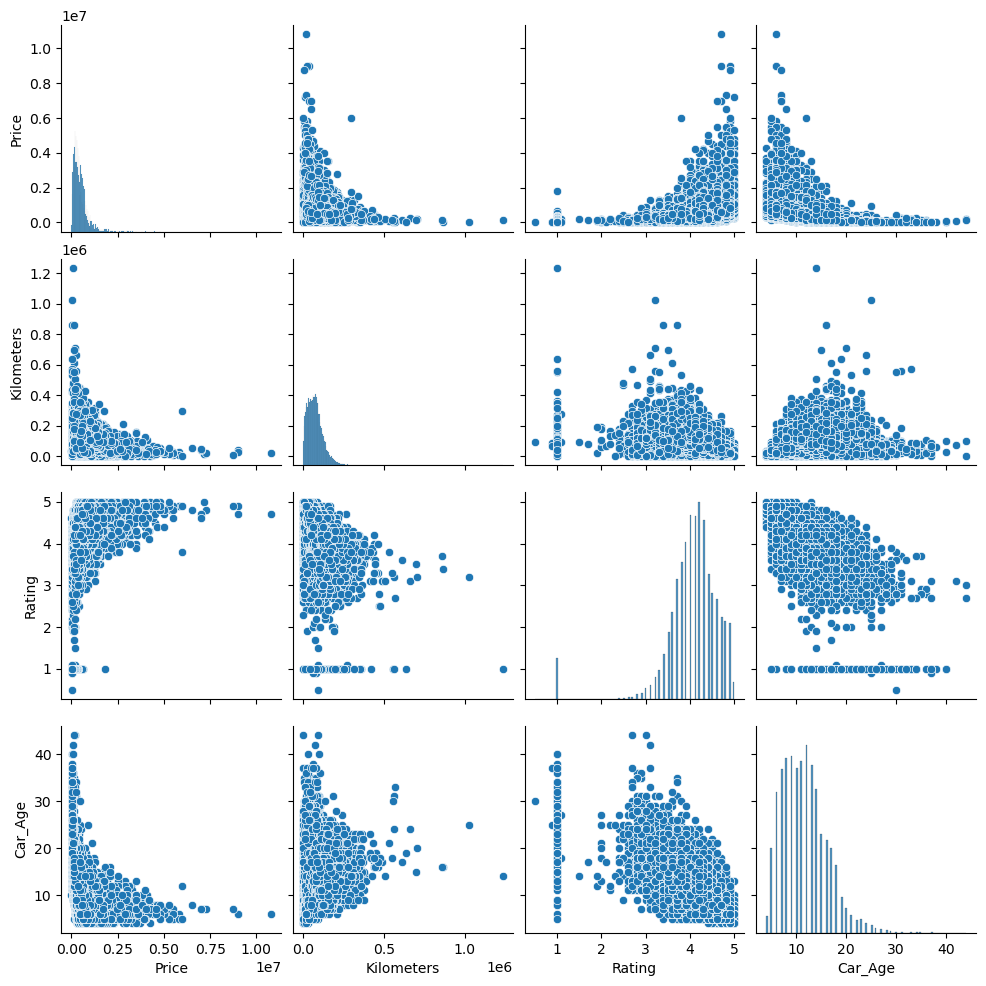

In [73]:
sns.pairplot(df[['Price', 'Kilometers', 'Rating', 'Car_Age']])
plt.show()


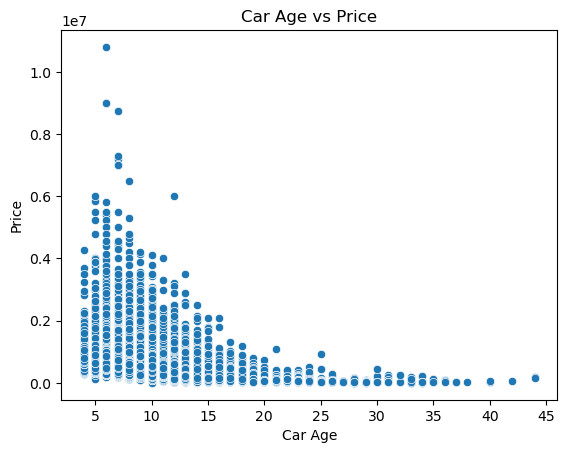

In [74]:
sns.scatterplot(x='Car_Age', y='Price', data=df)
plt.title('Car Age vs Price')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()


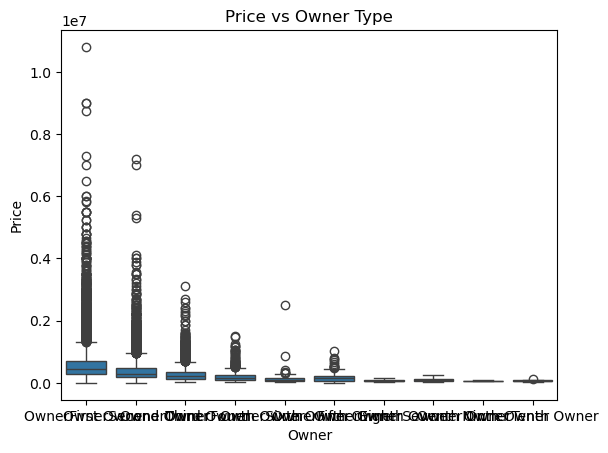

In [75]:
sns.boxplot(x='Owner', y='Price', data=df)
plt.title('Price vs Owner Type')
plt.show()


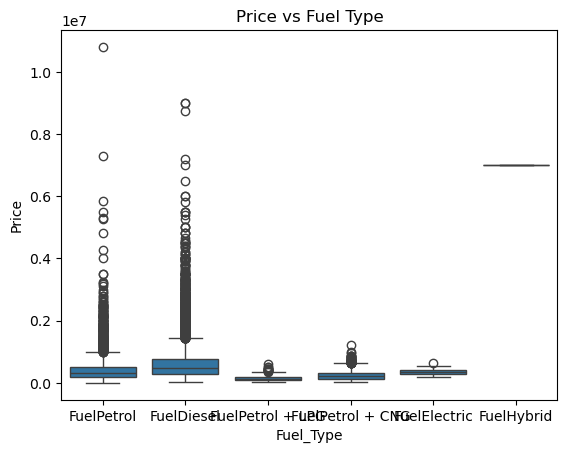

In [76]:
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price vs Fuel Type')
plt.show()


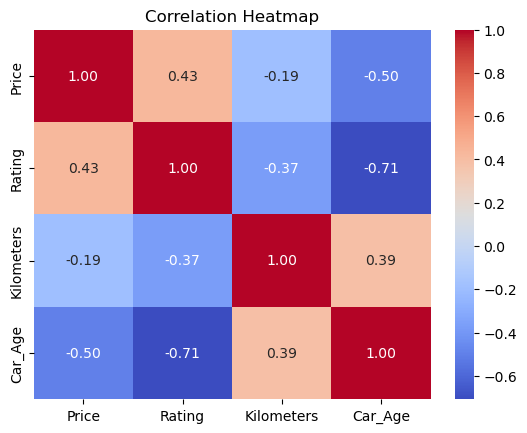

In [77]:
corr = df[['Price', 'Rating', 'Kilometers', 'Car_Age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [79]:
df.to_csv('cleaned_data.csv', index=False)


In [80]:
df

,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,Insurance_Type,Car_Age
0,174699,4.0,3686,34854,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired,14
1,333999,4.2,3686,39541,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp,11
2,353199,4.3,3686,23233,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp,10
3,237899,4.4,3686,27748,OwnerFirst Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeComp,11
4,300699,4.4,3686,12238,OwnerSecond Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeExpired,7
...,...,...,...,...,...,...,...,...,...
32153,150000,3.4,769,95792,OwnerThird Owner,FuelPetrol,TransmissionMANUAL,Insurance TypeInsurance Expired,16
32154,250000,3.5,769,54505,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeInsurance Expired,9
32155,500000,3.6,769,161322,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeInsurance Expired,16
32156,600000,4.7,769,52006,OwnerFirst Owner,FuelDiesel,TransmissionMANUAL,Insurance TypeZero Depreciation,8
